### ***Import required libraries***

In [1]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

### ***Read the dataset***



In [3]:
df=pd.read_csv("colon.csv")
df.head()

,id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time
0,1,1,3,1,43,0,0,0,5.0,1,2.0,3,0,1,1521
1,2,1,3,1,63,0,0,0,1.0,0,2.0,3,0,0,3087
2,3,1,1,0,71,0,0,1,7.0,1,2.0,2,0,1,963
3,4,1,3,0,66,1,0,0,6.0,1,2.0,3,1,1,293
4,5,1,1,1,69,0,0,0,22.0,1,2.0,3,1,1,659


### ***Organize Our Data***

In [4]:
df=df.drop(columns=['id', 'study'])
df.head(5)

,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time
0,3,1,43,0,0,0,5.0,1,2.0,3,0,1,1521
1,3,1,63,0,0,0,1.0,0,2.0,3,0,0,3087
2,1,0,71,0,0,1,7.0,1,2.0,2,0,1,963
3,3,0,66,1,0,0,6.0,1,2.0,3,1,1,293
4,1,1,69,0,0,0,22.0,1,2.0,3,1,1,659


In [5]:
# drop rows containing null values
df=df.dropna()

In [6]:
df.shape

(888, 13)

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


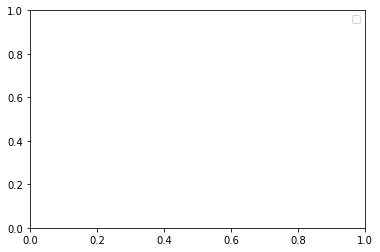

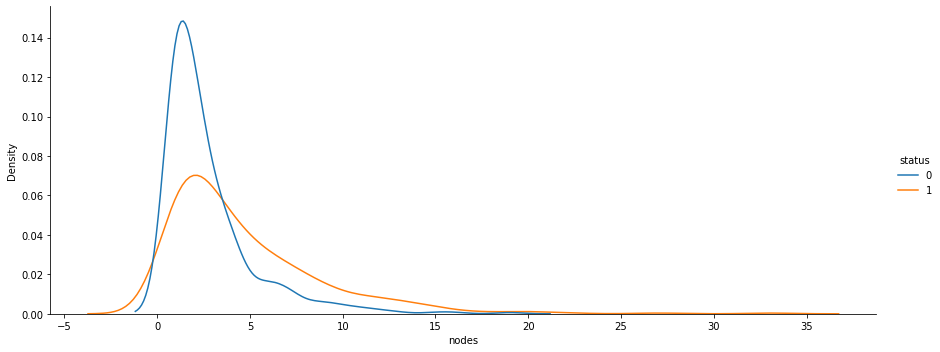

In [7]:
import seaborn as sns;# sns.set(color_codes=True)
# for i in df["nodes"].unique():
#   subset = df[df['status'] == i]
#   sns.kdeplot(subset["age"], color='b', shade=True, Label='alive')
alive = df[df['status'] == 0]
death = df[df['status'] == 1]
# sns.distplot(alive["age"], )
# sns.kdeplot(alive["nodes"], color='b', shade=True, Label='alive')
# sns.kdeplot(death["nodes"], color='r', shade=True, Label='death')
# sns.distplot(death["age"])
plt.legend()
plt.grid(False)
ax = plt.axes()
# ax.set_facecolor("white")
sns.displot(data=df, x="nodes", hue="status", kind="kde", aspect=2.5)
plt.grid(False)
ax.set_facecolor("white")
# sns.distplot(alive["nodes"], hist = False, kde = True,
#                  kde_kws = {'shade': True, 'linewidth': 3},
#                  label = 'alive')
# sns.distplot(death["nodes"], hist = False, kde = True,
#                  kde_kws = {'shade': True, 'linewidth': 3},
#                  label = 'death')

### ***Create two objects of KaplanMeierFitter():***
kmf_m is for male dataset.

kmf_f is for female dataset.



In [8]:
kmf_m=KaplanMeierFitter()
kmf_f=KaplanMeierFitter()
#kage1=KaplanMeierFitter()
#kage2=KaplanMeierFitter()
#kage3=KaplanMeierFitter()
#kage4=KaplanMeierFitter()
#kage5=KaplanMeierFitter()
#kage6=KaplanMeierFitter()
#krx1=KaplanMeierFitter()
#krx2=KaplanMeierFitter()
#krx3=KaplanMeierFitter()

### ***Divide data into groups:***

In [9]:
male = df.query("sex == 1")
female = df.query("sex == 0")
#node4_yes = df.query("node4 == 1")
#node4_no = df.query("node4 == 0")
#age1 = df.query("age <= 20")
#age2 = df.query("age > 20 and age <= 40")
#age3 = df.query("age > 40 and age <= 60")
#age4 = df.query("age > 60 and age <= 80")
#age5 = df.query("age > 80 and age <= 100")
#age6 = df.query("age > 100")
#rx1 = df.query("rx == 1")
#rx2 = df.query("rx == 2")
#rx3 = df.query("rx == 3")


### ***Fit data into KMF objects***

In [10]:
kmf_m.fit(durations=male["time"], event_observed=male["status"], label="1")
kmf_f.fit(durations=female["time"], event_observed=female["status"], label="2")
#kmf_m.fit(durations=node4_yes["time"], event_observed=node4_yes["status"], label="1")
#kmf_f.fit(durations=node4_no["time"], event_observed=node4_no["status"], label="0")
#kage1.fit(durations=age1["time"], event_observed=age1["status"], label="1")
#kage2.fit(durations=age2["time"], event_observed=age2["status"], label="2")
#kage3.fit(durations=age3["time"], event_observed=age3["status"], label="3")
#kage4.fit(durations=age4["time"], event_observed=age4["status"], label="4")
#kage5.fit(durations=age5["time"], event_observed=age5["status"], label="5")
#krx1.fit(durations=rx1["time"], event_observed=rx1["status"], label="1")
#krx2.fit(durations=rx2["time"], event_observed=rx2["status"], label="2")
#krx3.fit(durations=rx3["time"], event_observed=rx3["status"], label="3")

<lifelines.KaplanMeierFitter:"2", fitted with 428 total observations, 220 right-censored observations>

### ***Predicting survival probability KMF***

In [11]:
# male survival of 2000 days
kmf_m.predict(2000)

0.5545325122580017

In [12]:
# female survival of 2000 days
kmf_f.predict(2000)

0.5456132298827141

### ***Get the complete list of survival_probability:***

In [13]:
kmf_m.survival_function_

,1
timeline,
0.0,1.000000
24.0,0.997826
34.0,0.995652
45.0,0.993478
125.0,0.991304
...,...
3173.0,0.409018
3185.0,0.409018
3192.0,0.409018


In [14]:
kmf_f.survival_function_

,2
timeline,
0.0,1.000000
23.0,0.997664
52.0,0.995327
56.0,0.992991
79.0,0.990654
...,...
3078.0,0.497852
3238.0,0.497852
3308.0,0.497852


### ***Plot the graph:***

Text(0, 0.5, 'Survival rate')

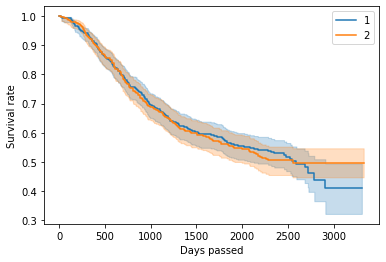

In [15]:
kmf_m.plot()
kmf_f.plot()


plt.xlabel("Days passed")
plt.ylabel("Survival rate")

### ***import Cox regression library:***



In [16]:
from lifelines import CoxPHFitter

### ***Create CPH object:***

In [17]:
cph=CoxPHFitter()

### ***Fit data into CPH object:***

In [18]:
# fitting all columns
cph.fit(df, "time", event_col="status")
cph.print_summary(columns=["coef","exp(coef)","exp(coef) lower 95%","exp(coef) upper 95%", "z", "p"])

/usr/local/lib/python3.7/dist-packages/lifelines/utils/printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  columns = summary_df.columns & self.columns
/usr/local/lib/python3.7/dist-packages/lifelines/utils/printer.py:61: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  columns = summary_df.columns & self.columns


<lifelines.CoxPHFitter: fitted with 888 total observations, 458 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 888
number of events observed = 430
   partial log-likelihood = -2699.01
         time fit was run = 2022-06-15 10:12:53 UTC

---
            coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%     z      p
covariate                                                                         
rx         -0.17       0.84                 0.75                 0.94 -2.92 <0.005
sex         0.01       1.01                 0.84                 1.22  0.12   0.91
age         0.01       1.01                 1.00                 1.02  1.79   0.07
obstruct    0.26       1.30                 1.03                 1.64  2.17   0.03
perfor      0.03       1.03                 0.61                 1.75  0.11   0.92
adhere      0.17       1.19                 0.92                 1.54  1.32   0.19
nodes       0.05       1.05                 1.02                 1.08  2.95 <0.005
differ      0.12       1.13                 0.93                 1.38  1.24   0.22
extent      0.45       1.56                 1.24                 1.97  3.78 <0.005
surg        0.24       1.27                 1.03                 1.56  2.23   0.03
node4       0.67       1.95                 1.48                 2.58  4.68 <0.005
---
Concordance = 0.67
Partial AIC = 5420.03
log-likelihood ratio test = 137.79 on 11 df
-log2(p) of ll-ratio test = 77.53

### ***Check which factor affects the most from the graph:***

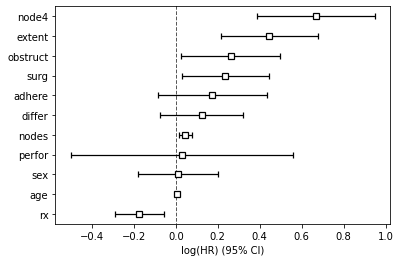

In [19]:
cph.plot()

In [30]:
print(df2)

     time  status  rx  nodes  extent  node4  obstruct  surg
0    1521       1   3    5.0       3      1         0     0
1    3087       0   3    1.0       3      0         0     0
2     963       1   1    7.0       2      1         0     0
3     293       1   3    6.0       3      1         1     1
4     659       1   1   22.0       3      1         0     1
..    ...     ...  ..    ...     ...    ...       ...   ...
924  1875       0   3    4.0       3      0         0     0
925  2154       0   2    1.0       3      0         0     0
926  1018       1   2    1.0       3      0         0     0
927  2072       0   3    4.0       3      1         1     1
928  1820       0   2    1.0       3      0         1     0

[888 rows x 8 columns]


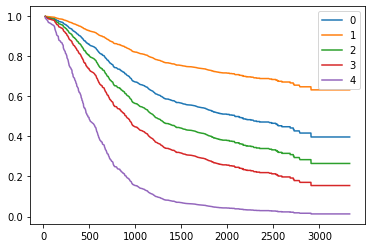

In [20]:
# Plot the survival function :
d_data = df.iloc[0:5,:]
cph.predict_survival_function(d_data).plot()



### ***An efficient approach: Take only significant columns***



In [21]:
# taking only significant columns
df2=df[["time", "status", "rx", "nodes", "extent", "node4", "obstruct", "surg"]]

# fitiing data into CPH
cph.fit(df2, "time", event_col="status")
cph.print_summary()

# instead of 11 columns we're getting same efficiency with only 6 columns

<lifelines.CoxPHFitter: fitted with 888 total observations, 458 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 888
number of events observed = 430
   partial log-likelihood = -2702.82
         time fit was run = 2022-06-15 10:12:54 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
rx         -0.17       0.85       0.06            -0.28            -0.05                 0.75                 0.95
nodes       0.05       1.05       0.02             0.02             0.08                 1.02                 1.08
extent      0.48       1.61       0.12             0.25             0.71                 1.28                 2.03
node4       0.65       1.91       0.14             0.37             0.92                 1.45                 2.51
obstruct    0.23       1.26       0.12            -0.00             0.46                 1.00                 1.58
surg        0.25       1.28       0.11             0.04             0.45                 1.04                 1.57

            cmp to     z      p   -log2(p)
covariate                                 
rx            0.00 -2.83 <0.005       7.75
nodes         0.00  3.16 <0.005       9.28
extent        0.00  4.05 <0.005      14.28
node4         0.00  4.58 <0.005      17.71
obstruct      0.00  1.93   0.05       4.23
surg          0.00  2.32   0.02       5.62
---
Concordance = 0.67
Partial AIC = 5417.64
log-likelihood ratio test = 130.18 on 6 df
-log2(p) of ll-ratio test = 82.81

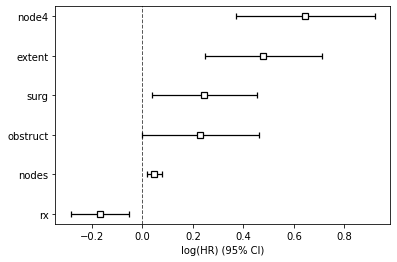

In [22]:
cph.plot()

### ***Plot the graph:***

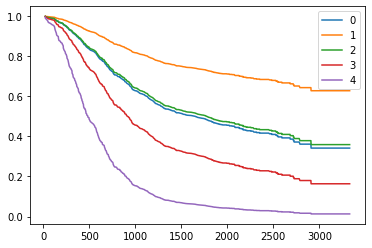

In [23]:
# Plot the survival function :
d_data = df.iloc[0:5,:]
cph.predict_survival_function(d_data).plot()

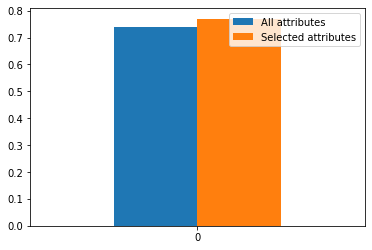

In [24]:

y = np.random.rand(1,2)
y[:,0]= 0.74
y[:,1]= 0.77
df = pd.DataFrame(y, columns=["All attributes", "Selected attributes"])

df.plot.bar(rot=0)